# Example for fitting Experimental Spectra using MATS with FFT Etalon Treatment
This example fits an experimental Oxygen A-Band spectrum and highlights the ability to treat etalons with FFT opposed to fitting through MATS.  



In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import MATS
from scipy import stats


import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("poster")


HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

## Define Spectrum Instances

Follow the Fitting Protocol for experimental spectrum to set-up Spectrum instance


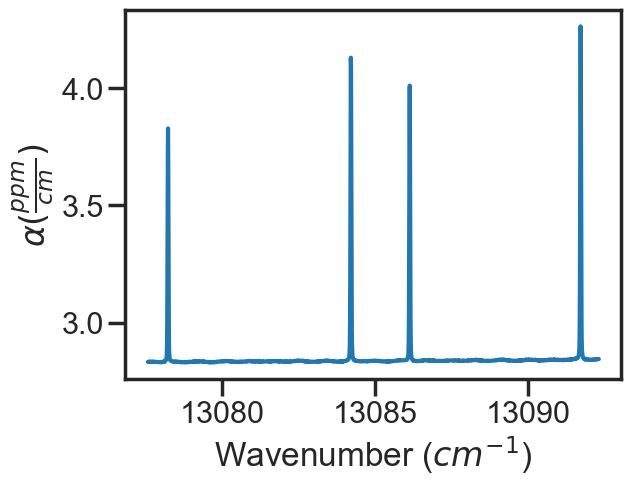

In [2]:
#Generic Fit Parameters
wave_range = 1.5 #range outside of experimental x-range to simulate
IntensityThreshold = 1e-30 #intensities must be above this value to be simulated
Fit_Intensity = 1e-26 #intensities must be above this value for the line to be fit



#Define all Spectra individually
filename = '22May17_P11P11_50Torr'
spec_1 = MATS.Spectrum(filename, 
                        molefraction = { 7 :0.01949}, natural_abundance = True, diluent = 'air', 
                        baseline_order = 1, 
                        input_freq = False, frequency_column = 'Wavenumber' ,
                        input_tau = True, tau_column = 'Mean tau/us', 
                        pressure_column = 'Pressure', temperature_column = 'Temperature', 
                        nominal_temperature = 296, x_shift = 0.00)



spec_1.plot_wave_alpha()



## Generate a Dataset



In [3]:
from MATS.linelistdata import linelistdata

In [4]:
#Read in linelists
PARAM_LINELIST = linelistdata['O2_ABand_Drouin_2017_linelist']
#Add all spectrum to a Dataset object
SPECTRA = MATS.Dataset([spec_1], 'FFT Etalon Example',PARAM_LINELIST)

#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
BASE_LINELIST = SPECTRA.generate_baseline_paramlist()


## Generate Fit Parameter Files


In [5]:
FITPARAMS = MATS.Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST, lineprofile = 'SDVP', linemixing = False, 
                                  fit_intensity = Fit_Intensity, threshold_intensity = IntensityThreshold, sim_window = wave_range,
                                  nu_constrain = True, sw_constrain = True, gamma0_constrain = True, delta0_constrain = True, 
                                   aw_constrain = True, as_constrain = True, 
                                   nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True,
                                    additional_columns = ['trans_id', 'local_lower_quanta', 'm'])

FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {7:{1:True, 2:True, 3:False}}, vary_sw = {7:{1:True, 2:True, 3:True}},
                                                    vary_gamma0 = {7:{1: True, 2:False, 3: False}, 1:{1:False}}, vary_n_gamma0 = {7:{1:True}}, 
                                                    vary_delta0 = {7:{1: False, 2:False, 3: False}, 1:{1:False}}, vary_n_delta0 = {7:{1:True}}, 
                                                    vary_aw = {7:{1: True, 2:False, 3: False}, 1:{1:False}}, vary_n_gamma2 = {7:{1:False}}, 
                                                    vary_as = {}, vary_n_delta2 = {7:{1:False}}, 
                                                    vary_nuVC = {7:{1:True}}, vary_n_nuVC = {7:{1:False}},
                                                    vary_eta = {}, vary_linemixing = {7:{1:False}})

FITPARAMS.generate_fit_baseline_linelist(vary_baseline = True, vary_molefraction = {7:False, 1:False}, vary_xshift = False)





,Segment Number,Pressure,Pressure_err,Pressure_vary,Temperature,Temperature_err,Temperature_vary,x_shift,x_shift_err,x_shift_vary,molefraction_O2,molefraction_O2_err,molefraction_O2_vary,baseline_a,baseline_a_err,baseline_a_vary,baseline_b,baseline_b_err,baseline_b_vary
Spectrum Number,,,,,,,,,,,,,,,,,,,
1,1,0.065759,0.0,False,298.613972,0.0,False,0.0,0.0,False,0.01949,0.0,False,0.0,0.0,True,0.0,0.0,True


## Fit Dataset


C:\Users\ema3\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_1_1           0.06576     -inf      inf     None    False     None     None
SD_delta_air_line_0          0     -inf      inf     None    False     None     None
SD_delta_air_line_10         0     -inf      inf     None    False     None     None
SD_delta_air_line_11         0     -inf      inf     None    False     None     None
SD_delta_air_line_13         0     -inf      inf     None    False     None     None
SD_delta_air_line_14         0     -inf      inf     None    False     None     None
SD_delta_air_line_17         0     -inf      inf     None    False     None     None
SD_delta_air_line_2          0     -inf      inf     None    False     None     None
SD_delta_air_line_20         0     -inf      inf     None    False     None     None
SD_delta_air_line_22         0     -inf      inf     None    False     None     None
SD_delta_air_line_23         0     -inf      inf     None    Fa

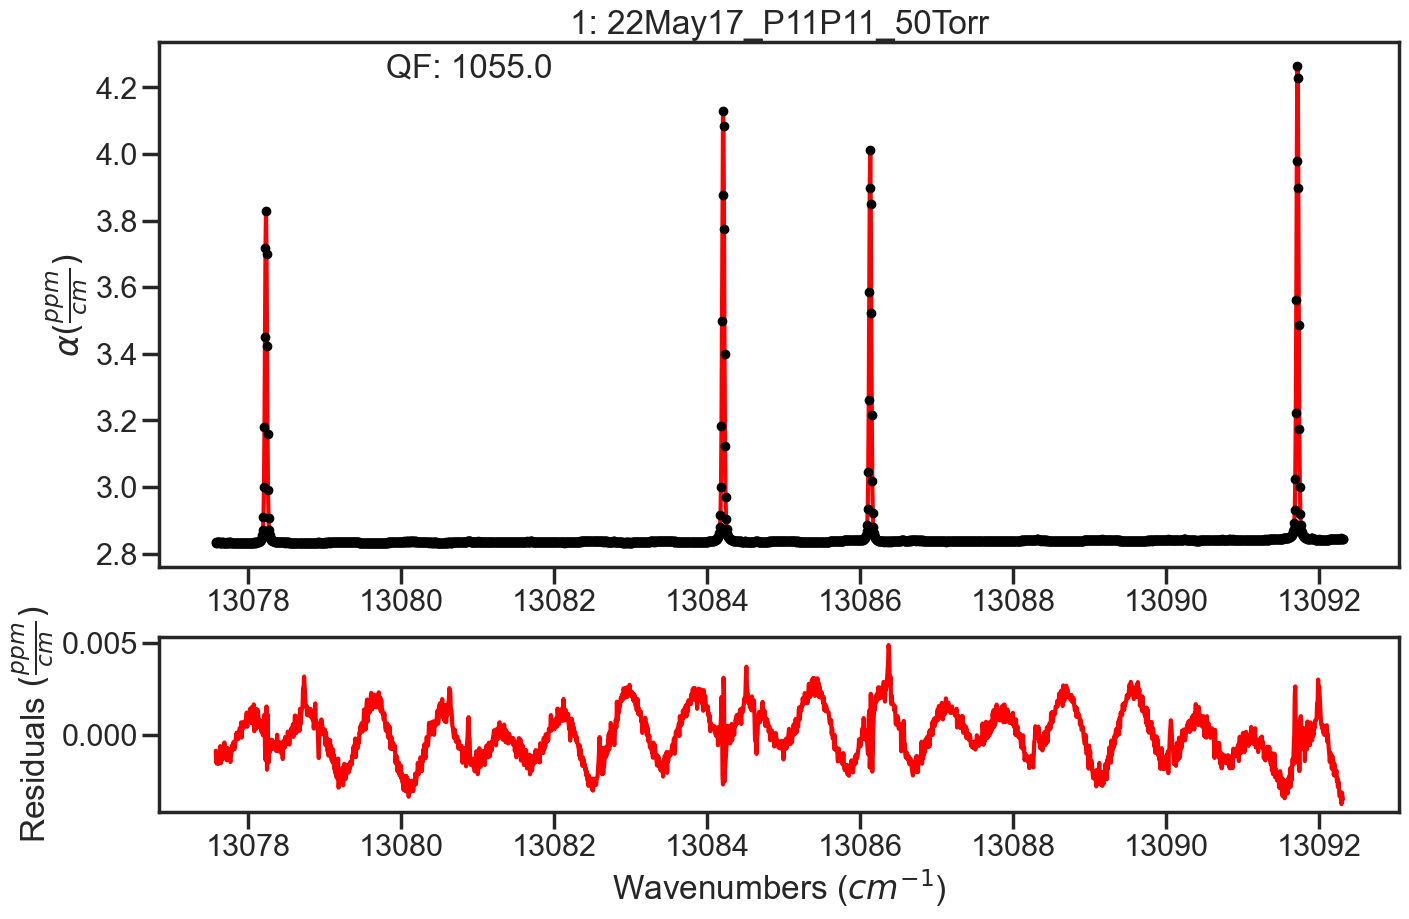

,Spectrum Number,Spectrum Name,Frequency (MHz),Wavenumber (cm-1),Pressure (Torr),Temperature (C),Tau (us),Tau Error (%),Alpha (ppm/cm),Model (ppm/cm),Residuals (ppm/cm),QF,Background,CIA (ppm/cm)
0,1,22May17_P11P11_50Torr,3.920559e+08,13077.57623,49.975762,25.507265,11.775746,0.0,2.832637,2.831787,-0.000849,1055.0,2.831787,0.0
1,1,22May17_P11P11_50Torr,3.920561e+08,13077.58281,49.975762,25.507265,11.773054,0.0,2.833284,2.831792,-0.001493,1055.0,2.831792,0.0
2,1,22May17_P11P11_50Torr,3.920563e+08,13077.58946,49.975762,25.510110,11.774179,0.0,2.833014,2.831796,-0.001218,1055.0,2.831796,0.0
3,1,22May17_P11P11_50Torr,3.920565e+08,13077.59616,49.975762,25.509077,11.772790,0.0,2.833348,2.831800,-0.001548,1055.0,2.831800,0.0
4,1,22May17_P11P11_50Torr,3.920567e+08,13077.60283,49.975762,25.509506,11.772815,0.0,2.833342,2.831805,-0.001537,1055.0,2.831805,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1,22May17_P11P11_50Torr,3.924968e+08,13092.28401,49.995763,25.504812,11.726391,0.0,2.844559,2.841439,-0.003119,1055.0,2.841438,0.0
2216,1,22May17_P11P11_50Torr,3.924970e+08,13092.29067,49.995763,25.506250,11.723833,0.0,2.845179,2.841444,-0.003736,1055.0,2.841442,0.0
2217,1,22May17_P11P11_50Torr,3.924972e+08,13092.29725,50.005764,25.506664,11.726392,0.0,2.844559,2.841447,-0.003111,1055.0,2.841447,0.0
2218,1,22May17_P11P11_50Torr,3.924974e+08,13092.30382,50.005764,25.506197,11.725386,0.0,2.844803,2.841452,-0.003351,1055.0,2.841451,0.0


In [6]:
fit_data = MATS.Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', minimum_parameter_fit_intensity = Fit_Intensity, weight_spectra = False)
params = fit_data.generate_params()

for param in params:
    if 'SD_gamma' in param:
        if params[param].vary == True:
            params[param].set(min = 0.01, max = 0.25)

            
        


result = fit_data.fit_data(params, wing_cutoff = 25,  
                          method = 'least_squares')
print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)





## Define function for FFT filter on Residuals to remove etalons



1054.594700167862 2055.2155096630386


C:\Users\ema3\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


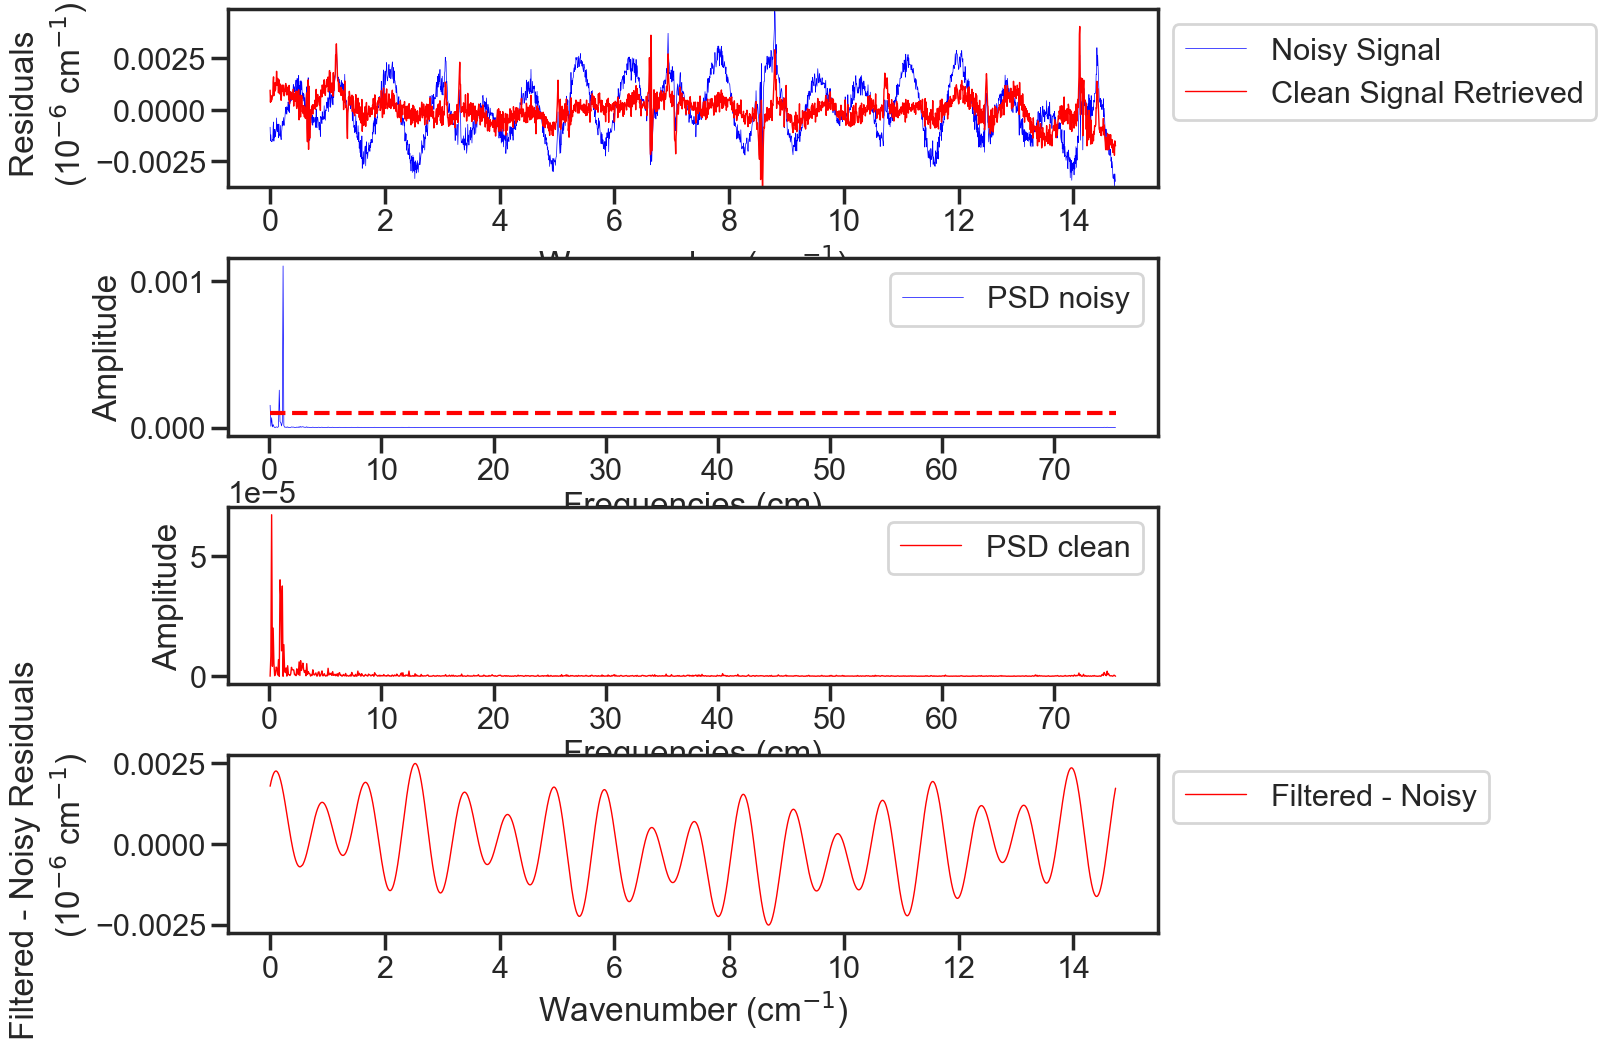

In [7]:
def fft_filter_residuals(spec, threshold, min_freq_filtered = None):
    '''
    spec is a MATS spectrum object
    
    threshold is the FFT amplitude above which frequencies are filtered out
    
    min_freq_filter sets a lower limit on frequencies that are removed.  This prevents inadequately sampled broad etalons from being filtered out
    '''
    #Based on Example from https://www.earthinversion.com/techniques/signal-denoising-using-fast-fourier-transform/
    t = spec.wavenumber - spec.wavenumber.min()
    n = len(spec.wavenumber)
    dt = (stats.mode(np.diff(spec.wavenumber)).mode)
    signal = spec.residuals
    fhat = np.fft.fft(signal, n) #computes the fft
    psd = fhat * np.conj(fhat)/n
    freq = (1/(dt*n))*np.arange(n) #frequency array
    idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index
    
    #Filter Noise
    #threshold = 1e-6
    psd_idxs = psd<threshold #array of 0 or 1
    
    if min_freq_filtered != None:
        for i in range(0, len(freq[freq<min_freq_filtered])):
            psd_idxs[i] = True
 


    
    psd_clean = psd*psd_idxs #zero out all unnecessary powers
    fhat_clean = psd_idxs *fhat #used to retrieve the signal
    
    signal_filtered = np.fft.ifft(fhat_clean) #inverse fourier transform
    print ((spec.alpha.max()-spec.alpha.min()) / np.std(signal), (spec.alpha.max()-spec.alpha.min())/np.std(signal_filtered))
    
    fig, ax = plt.subplots(4,1, figsize=(12, 12))
    ax[0].plot(t, signal, color='b', lw=0.5, label='Noisy Signal')
    ax[0].plot(t, signal_filtered, color='r', lw=1, label='Clean Signal Retrieved')
    #ax[0].plot(t, signal_clean, color='r', lw=1, label='Clean Signal')
    ax[0].set_ylim([np.min(signal), np.max(signal)])
    ax[0].set_xlabel('Wavenumber (cm$^{-1}$)')
    ax[0].set_ylabel('Residuals \n (10$^{-6}$ cm$^{-1}$)')
    ax[0].legend(bbox_to_anchor = [1,1])

    ax[1].plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', lw=0.5, label='PSD noisy')
    ax[1].hlines(threshold, freq[idxs_half].min(), freq[idxs_half].max(), colors = 'r', linestyles = 'dashed')
    ax[1].set_xlabel('Frequencies (cm)')
    ax[1].set_ylabel('Amplitude')
    ax[1].legend(bbox_to_anchor = [1,1])

    ax[2].plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', lw=1, label='PSD clean')
    ax[2].set_xlabel('Frequencies (cm)')
    ax[2].set_ylabel('Amplitude')
    ax[2].legend(bbox_to_anchor = [1,1])

    ax[3].plot(t, np.real(signal_filtered-signal), color='r', lw=1, label='Filtered - Noisy')
    #ax[3].plot(t, signal, color='b', lw=0.5, label='Noisy Signal')
    #ax[3].set_ylim([np.min(signal),  np.max(signal)])
    ax[3].set_xlabel('Wavenumber (cm$^{-1}$)')
    ax[3].set_ylabel('Filtered - Noisy Residuals \n(10$^{-6}$ cm$^{-1}$)')
    ax[3].legend(bbox_to_anchor = [1,1])

    plt.subplots_adjust(hspace=0.4)
    plt.savefig('signal-analysis.png', dpi=300)
    return np.real(signal_filtered-signal)

etalons = fft_filter_residuals(spec_1, 1e-4)
summary = pd.read_csv('FFT Etalon Example.csv')
summary['Etalons'] = etalons
summary['Alpha - (Baseline + Etalons)'] = summary['Alpha (ppm/cm)'] - (summary['Background'] + summary['Etalons'])
summary.to_csv('FFT Etalon Example.csv', index = False)

data_file = pd.read_csv(filename + '.csv')
data_file['Alpha - (Baseline + Etalons)'] = summary['Alpha (ppm/cm)'] - (summary['Background'] + summary['Etalons'])
data_file.to_csv(filename + '.csv', index = False)

Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_1_1           0.06576     -inf      inf     None    False     None     None
SD_delta_air_line_0          0     -inf      inf     None    False     None     None
SD_delta_air_line_11         0     -inf      inf     None    False     None     None
SD_delta_air_line_14         0     -inf      inf     None    False     None     None
SD_delta_air_line_2          0     -inf      inf     None    False     None     None
SD_delta_air_line_23         0     -inf      inf     None    False     None     None
SD_delta_air_line_27         0     -inf      inf     None    False     None     None
SD_delta_air_line_3          0     -inf      inf     None    False     None     None
SD_delta_air_line_6          0     -inf      inf     None    False     None     None
SD_gamma_air_line_0        0.1     -inf      inf     None    False     None     None
SD_gamma_air_line_11   0.09126     0.01     0.25     None     T

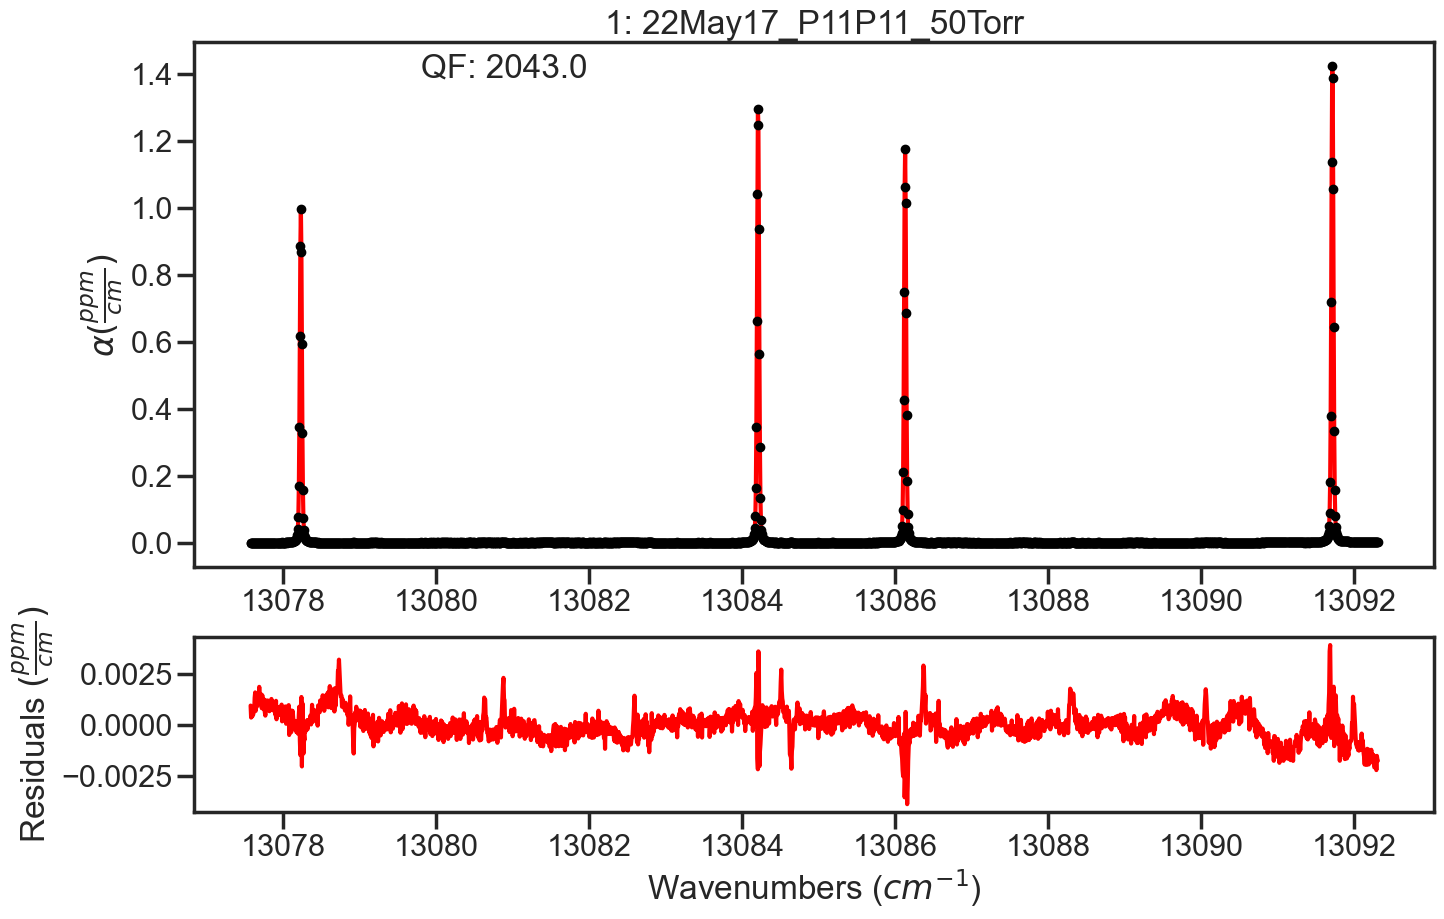

,Spectrum Number,Spectrum Name,Frequency (MHz),Wavenumber (cm-1),Pressure (Torr),Temperature (C),Tau (us),Tau Error (%),Alpha (ppm/cm),Model (ppm/cm),Residuals (ppm/cm),QF,Background,CIA (ppm/cm)
0,1,22May17_P11P11_50Torr,3.920559e+08,13077.57623,49.975762,25.507265,-35321.405621,0.0,-0.000944,0.000000e+00,0.000944,2043.0,0.0,0.0
1,1,22May17_P11P11_50Torr,3.920561e+08,13077.58281,49.975762,25.507265,-92906.494753,0.0,-0.000359,0.000000e+00,0.000359,2043.0,0.0,0.0
2,1,22May17_P11P11_50Torr,3.920563e+08,13077.58946,49.975762,25.510110,-48446.146834,0.0,-0.000689,0.000000e+00,0.000689,2043.0,0.0,0.0
3,1,22May17_P11P11_50Torr,3.920565e+08,13077.59616,49.975762,25.509077,-81424.711236,0.0,-0.000410,0.000000e+00,0.000410,2043.0,0.0,0.0
4,1,22May17_P11P11_50Torr,3.920567e+08,13077.60283,49.975762,25.509506,-71362.628246,0.0,-0.000467,0.000000e+00,0.000467,2043.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1,22May17_P11P11_50Torr,3.924968e+08,13092.28401,49.995763,25.504812,20037.560511,0.0,0.001665,1.678394e-06,-0.001663,2043.0,0.0,0.0
2216,1,22May17_P11P11_50Torr,3.924970e+08,13092.29067,49.995763,25.506250,15109.239242,0.0,0.002208,1.609923e-06,-0.002206,2043.0,0.0,0.0
2217,1,22May17_P11P11_50Torr,3.924972e+08,13092.29725,50.005764,25.506664,22060.479575,0.0,0.001512,9.665246e-07,-0.001511,2043.0,0.0,0.0
2218,1,22May17_P11P11_50Torr,3.924974e+08,13092.30382,50.005764,25.506197,19806.563413,0.0,0.001684,9.257025e-07,-0.001683,2043.0,0.0,0.0


In [8]:
spec_1 = MATS.Spectrum(filename, 
                        molefraction = { 7 :0.01949}, natural_abundance = True, diluent = 'air', 
                        baseline_order = 1, 
                        input_freq = False, frequency_column = 'Wavenumber' ,
                        input_tau = False, tau_column = 'Alpha - (Baseline + Etalons)', 
                        pressure_column = 'Pressure', temperature_column = 'Temperature', 
                        nominal_temperature = 296, x_shift = 0.00)


#Add all spectrum to a Dataset object
SPECTRA = MATS.Dataset([spec_1], 'Fitting after Etalon and Baseline Removal',PARAM_LINELIST) #Uses baseline and etalon removed spectra
#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order

#Use the existing baseline and parameter list as starting point
FITPARAMS.generate_fit_baseline_linelist(vary_baseline = False, vary_molefraction = {7:False, 1:False}, vary_xshift = False)


fit_data = MATS.Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', minimum_parameter_fit_intensity = Fit_Intensity, weight_spectra = False)
params = fit_data.generate_params()

for param in params:
    if 'SD_gamma' in param:
        if params[param].vary == True:
            params[param].set(min = 0.01, max = 0.25)

            
        


result = fit_data.fit_data(params, wing_cutoff = 25,  
                          method = 'least_squares')
print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)